# Carrega DS principal

In [1]:
#Standard Includes
import sys
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import read_csv

#The Machine learning alogorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Test train split
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Just to switch off pandas warning
pd.options.mode.chained_assignment = None

# Used to write our model to a file
from joblib import dump, load
#dump(clf, 'filename.joblib') 
#clf = load('filename.joblib')

# Cross validation
from sklearn.metrics import confusion_matrix

# Accuracy
from sklearn.metrics import accuracy_score

# ROC
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
# Load dataset

# original
#df = pd.read_csv("data.csv",delimiter=",")

# TESTE
#df = pd.read_csv("data.csv", low_memory=False)
#df = pd.read_csv("darpa_gen_man_996_2por1.csv", low_memory=False)
#df = pd.read_csv("normal_darpa2009_150x38.csv", low_memory=False)
df = pd.read_csv("normal_hping3_5500_1por1.csv", low_memory=False)

# df = pd.read_csv("DS\\full\\mypcap_merged_diff.csv",delimiter=";")

In [3]:
df.shape

(5500, 7)

In [4]:
df.head()

,SSIP,SSP,SDFP,SDFB,SFE,RFIP,CLASS
0,7.000000,1.666667,49580.404316,2.082423e+06,31112.000000,0.000214,1
1,7.000000,1.666667,41663.682036,1.750235e+06,56486.000000,0.000118,1
2,7.000000,1.666667,30837.438651,1.295181e+06,5598.666667,0.001191,1
3,6.666667,1.666667,4.825871,8.072613e+02,1105.333333,0.006030,0
4,7.000000,1.666667,520.428547,1.568241e+07,20328.333333,0.000344,0


In [5]:
df

,SSIP,SSP,SDFP,SDFB,SFE,RFIP,CLASS
0,7.000000,1.666667,49580.404316,2.082423e+06,31112.000000,0.000214,1
1,7.000000,1.666667,41663.682036,1.750235e+06,56486.000000,0.000118,1
2,7.000000,1.666667,30837.438651,1.295181e+06,5598.666667,0.001191,1
3,6.666667,1.666667,4.825871,8.072613e+02,1105.333333,0.006030,0
4,7.000000,1.666667,520.428547,1.568241e+07,20328.333333,0.000344,0
...,...,...,...,...,...,...,...
5495,7.000000,2.000000,91972.713535,3.862874e+06,77889.333333,0.000086,1
5496,7.000000,1.666667,43528.392997,1.828201e+06,6518.333333,0.001023,1
5497,7.000000,1.666667,37588.342139,1.579022e+06,56486.000000,0.000118,1
5498,7.000000,2.000000,66498.552367,2.792947e+06,21091.000000,0.000316,1


In [6]:
print(df.corr())

           SSIP       SSP      SDFP      SDFB       SFE      RFIP     CLASS
SSIP   1.000000  0.047723  0.326439  0.129785  0.215133 -0.251387  0.419885
SSP    0.047723  1.000000 -0.023601  0.008892  0.149757 -0.025601 -0.029810
SDFP   0.326439 -0.023601  1.000000 -0.168222  0.017393 -0.211742  0.750784
SDFB   0.129785  0.008892 -0.168222  1.000000  0.732332 -0.100194 -0.299268
SFE    0.215133  0.149757  0.017393  0.732332  1.000000 -0.167447 -0.105040
RFIP  -0.251387 -0.025601 -0.211742 -0.100194 -0.167447  1.000000 -0.203796
CLASS  0.419885 -0.029810  0.750784 -0.299268 -0.105040 -0.203796  1.000000


Fim do carregamento do DS principal


## Inicia o tratamento do DS para o ML (DS completo)

In [7]:
# Converte o string em float
#df['ip_src'] = pd.Categorical(df['ip_src'])
#df['ip_src'] = df.ip_src.cat.codes
#df['ip_dst'] = pd.Categorical(df['ip_dst'])
#df['ip_dst'] = df.ip_dst.cat.codes

In [8]:
# Aplica a escala por MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#df[["proto","ip_src","ip_dst","port_src","port_dst","length","time"]] = scaler.fit_transform(df[["proto","ip_src","ip_dst","port_src","port_dst","length","time"]])
df[["SSIP","SSP","SDFP","SDFB","SFE","RFIP"]] = scaler.fit_transform(df[["SSIP","SSP","SDFP","SDFB","SFE","RFIP"]])

# Escala os atributos utilizando scale
#df[["proto","ip_src","ip_dst","port_src","port_dst","length","time"]] = scale(df[["proto","ip_src","ip_dst","port_src","port_dst","length","time"]])
df[["SSIP","SSP","SDFP","SDFB","SFE","RFIP"]] = scale(df[["SSIP","SSP","SDFP","SDFB","SFE","RFIP"]])

In [9]:
# Atributos e class

#features = df[["port_src","port_dst","length","time"]]
features = df[["SSIP","SSP","SDFP","SDFB","SFE","RFIP",]]
target = df["CLASS"]

In [10]:
features

,SSIP,SSP,SDFP,SDFB,SFE,RFIP
0,0.419885,0.028528,0.977242,-0.290835,-0.317281,-0.273755
1,0.419885,0.028528,0.696718,-0.301272,-0.095212,-0.282301
2,0.419885,0.028528,0.313097,-0.315569,-0.540570,-0.187063
3,-0.397012,0.028528,-0.779437,-0.356237,-0.579894,0.242559
4,0.419885,0.028528,-0.761167,0.136462,-0.411658,-0.262207
...,...,...,...,...,...,...
5495,0.419885,1.791514,2.479387,-0.234895,0.092106,-0.285180
5496,0.419885,0.028528,0.762793,-0.298822,-0.532521,-0.201978
5497,0.419885,0.028528,0.552311,-0.306651,-0.095212,-0.282301
5498,0.419885,1.791514,1.576726,-0.268511,-0.404983,-0.264716


In [11]:
features.describe()


,SSIP,SSP,SDFP,SDFB,SFE,RFIP
count,5.500000e+03,5.500000e+03,5.500000e+03,5.500000e+03,5.500000e+03,5.500000e+03
mean,-9.611705e-16,2.196223e-17,-6.588669e-17,-5.490558e-18,-2.712981e-17,-1.679465e-17
std,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00
min,-1.101667e+01,-1.734457e+00,-7.796080e-01,-3.562626e-01,-5.892559e-01,-2.918004e-01
25%,-3.970118e-01,2.852831e-02,-7.793776e-01,-3.562261e-01,-5.621267e-01,-2.851804e-01
50%,4.198849e-01,2.852831e-02,-6.818917e-01,-2.995418e-01,-4.152988e-01,-2.630546e-01
75%,4.198849e-01,2.852831e-02,7.532657e-01,-2.267390e-01,9.210585e-02,-1.035354e-01
max,4.198849e-01,1.791514e+00,3.091954e+00,6.324156e+00,4.964653e+00,1.614907e+01


In [12]:
# Dados de treino
featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, target, test_size = .20, random_state = 42)

Fim do carregamento e tratamento do DS

# Início do Machine Learning para o DS tratado (DS completo ou SubDS)

## RF

In [15]:
# Cria modelo

# Usando a de 94.3%

param_grid = {
    'n_estimators': [1, 3, 5, 7, 10, 25, 50, 75, 80, 100, 500],
    'criterion': ['entropy', 'gini'],
    'min_samples_split': [2, 20, 40, 50],
    'min_samples_leaf': [None, 1, 40, 100],
    'max_depth': [None, 2, 3, 4, 5, 10],
    'max_leaf_nodes': [None, 2, 3, 5, 12, 17],
    'max_features': [1, 2, 3, 4, 5],
    'random_state': [None, 10, 20, 42, 66, 72, 80, 100],
}

# Alcança 99.9% - Possível overfitting
# ULTIMO USADO
#clf = RandomForestClassifier(n_estimators = 500,
#                             criterion = "entropy",
#                             max_depth = 4,
#                             verbose = False,
#                             max_leaf_nodes = 17,
#                             random_state = 42,
#                             n_jobs = 32
#                            )

# Alcança 95.1%
#clf = RandomForestClassifier(n_estimators = 80,
#                             criterion = "entropy",
#                             max_depth = 2,
#                             verbose = True,
#                             max_leaf_nodes = 2,
#                             random_state = 66,
#                             n_jobs = 12
#                            )

# Alcança 96.2%
#clf = RandomForestClassifier(n_estimators = 80,
#                             criterion = "entropy",
#                             max_depth = 2,
#                             verbose = True,
#                             max_leaf_nodes = 2,
#                             random_state = 100,
#                             n_jobs = 12
#                            )

# Alcança 89.2%
#clf = RandomForestClassifier(n_estimators = 75,
#                             criterion = "entropy",
#                             max_depth = 2,
#                             verbose = True,
#                             max_leaf_nodes = 2,
#                             random_state = 100,
#                             n_jobs = 12
#                            )

# Alcança 89%
#clf = RandomForestClassifier(n_estimators = 50,
#                             criterion = "entropy",
#                             max_depth = 2,
#                             verbose = True,
#                             max_leaf_nodes = 2,
##                             random_state = 72,
#                             n_jobs = 12
#                        )

# Alcança 94.3% - Ideal?
#clf = RandomForestClassifier(n_estimators = 100,
#                             criterion = "entropy",
#                             max_depth = 2,
##                             verbose = True,
 #                            max_leaf_nodes = 2,
 #                            random_state = 42,
 #                            n_jobs = 12,
  #                      )

# Alcança 95.1% - Ideal?
##clf = RandomForestClassifier(n_estimators = 75,
#                             criterion = "entropy",
##                             max_depth = 2,
#                             verbose = True,
#                             max_leaf_nodes = 2,
#                             random_state = 42,
#                             n_jobs = 12)

# Alcança 96.2% - Possível overfitting
#clf = RandomForestClassifier(n_estimators = 100,
#                             criterion = "entropy",
##                             max_depth = 3,
#                             verbose = True,
##                             max_leaf_nodes = 2,
#                             random_state = 42,
#                             n_jobs = 12)

# Alcança 98.4% - Possível overfitting
## clf = RandomForestClassifier(n_estimators = 100,
#                             criterion = "entropy",
##                             max_depth = 4,
#                             verbose = True,
##                             max_leaf_nodes = 3,
#                             random_state = 42,
#                             n_jobs = 12)

# Alcança 99.9% - Possível overfitting
#clf = RandomForestClassifier(n_estimators = 1000,
#                             criterion = "entropy",
#                             max_depth = 5,
#                             verbose = True,
#                             max_leaf_nodes = 17,
#                             random_state = 42,
#                             n_jobs = 12)

In [16]:
clf


RandomForestClassifier()

In [17]:
# Constrói o modelo
clf = clf.fit(features, target)

In [18]:
# Treino
model = clf.fit(featureTrain, targetTrain)
prever = model.predict(featureTest)

In [19]:
# Calcula a acurácia
scores = clf.score(features, target)
print(scores*100)

100.0


In [20]:
features

,SSIP,SSP,SDFP,SDFB,SFE,RFIP
0,0.419885,0.028528,0.977242,-0.290835,-0.317281,-0.273755
1,0.419885,0.028528,0.696718,-0.301272,-0.095212,-0.282301
2,0.419885,0.028528,0.313097,-0.315569,-0.540570,-0.187063
3,-0.397012,0.028528,-0.779437,-0.356237,-0.579894,0.242559
4,0.419885,0.028528,-0.761167,0.136462,-0.411658,-0.262207
...,...,...,...,...,...,...
5495,0.419885,1.791514,2.479387,-0.234895,0.092106,-0.285180
5496,0.419885,0.028528,0.762793,-0.298822,-0.532521,-0.201978
5497,0.419885,0.028528,0.552311,-0.306651,-0.095212,-0.282301
5498,0.419885,1.791514,1.576726,-0.268511,-0.404983,-0.264716


# ESTATÍSTICAS

## Importância dos atributos

In [21]:
# Extraindo a importância
importances = clf.feature_importances_
indices = np.argsort(importances)

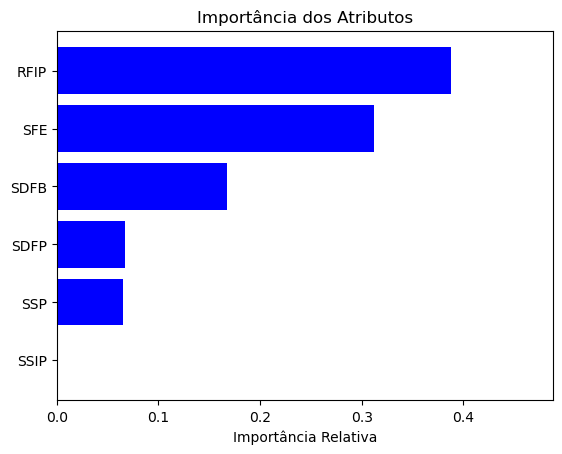

In [22]:
# Plot da Importância dos Atributos
plt.figure(1)
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),features)
plt.xticks(np.arange(0, max(importances[indices])+0.1, 0.1))
plt.xlim(0, max(importances[indices])+0.1)
plt.xlabel('Importância Relativa')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.savefig('imp_rf_sintetico.svg', format='svg')
plt.show()


In [ ]:
# Plot da Importância dos Atributos
#plt.figure(1)
#plt.title('Importância dos Atributos')
#plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
#plt.yticks(range(len(indices)),features)
#plt.xlabel('Importância Relativa')
#plt.rcParams['pdf.fonttype'] = 42
#plt.rcParams['ps.fonttype'] = 42
#plt.savefig('importancia.svg', format='svg')
#plt.show()
#
#plt.plot(range(len(indices)), importances[indices], color='b')
#
#plt.scatter(range(len(indices)), importances[indices], color='b')



## F1 SCORE

In [23]:
from sklearn.metrics import f1_score

# Fit the model on the training data
clf.fit(featureTrain, targetTrain)

# Make predictions on the test data
targetPred = clf.predict(featureTest)

# Calculate the F1 score
f1 = f1_score(targetTest, targetPred)

print("F1 Score: ", f1)

F1 Score:  1.0


## ROC

In [24]:
from sklearn.metrics import roc_curve, auc

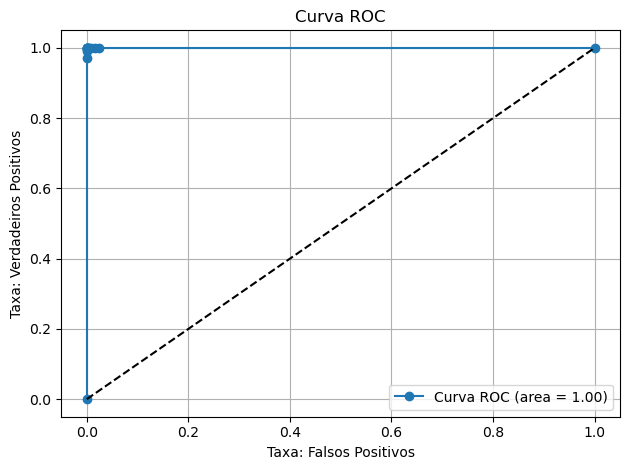

In [25]:
fpr, tpr, _ = roc_curve(target, clf.predict_proba(features)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (area = %0.2f)' % roc_auc, marker='o')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Taxa: Falsos Positivos')#False Positive Rate
plt.ylabel('Taxa: Verdadeiros Positivos')#True Positive Rate
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig('roc_rf_sintetico.svg', format='svg')
plt.show()

## Matriz de confusão

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Accuracy = 100.0%
----Confusion Matrix-----
[[2750    0]
 [   0 2750]]


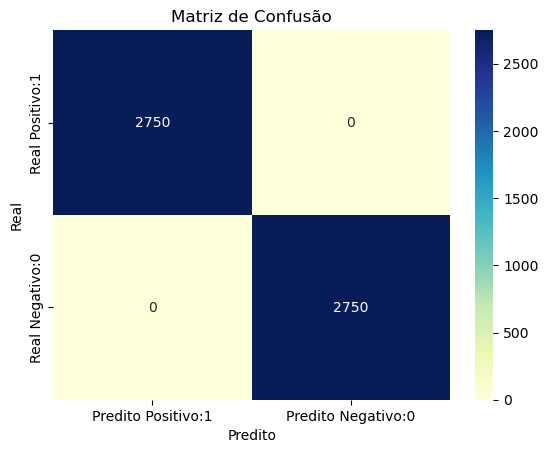

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Predict the Attack
pred = clf.predict_proba(features)
print(pred)

# Calculate the Accuracy
accuracy = clf.score(features, target)
print("Accuracy = {}%".format(accuracy * 100))

# Calculate Confusion Matrix
cm = confusion_matrix(target, pred.argmax(axis=1))
print("----Confusion Matrix-----")
print(cm)

# Visualize Confusion Matrix with Seaborn Heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Predito Positivo:1', 'Predito Negativo:0'], 
                                 index=['Real Positivo:1', 'Real Negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Predito')
plt.savefig('matriz_rf_sintetico.svg', format='svg')
plt.show()

In [ ]:
#Predict the Attack
#pred = clf.predict_proba(features)
#print (pred)

#Calculate the Accuracy
#accuracy = clf.score(features, target)
#print ("Accuracy = {}%".format(accuracy * 100))

#Calculate Confusion Matrix
#results = confusion_matrix(pred, target)
#confusion_matrix()
#print ("----Confusion Matrix-----")
#print (results)
#plt.matshow(results)
#plt.title('Confusion Matrix')
#plt.colorbar()
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show()

# GRAVA O CLASSIFICADOR

In [ ]:
# Grava o clf para um arquivo
dump(clf, 'cls_caida_rf.joblib') 

# Carrega o clf de um arquivo
#clf = load('classifier_rf.joblib')

## TESTE ROLLING

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("data.csv", low_memory=False)

In [ ]:
import pandas as pd
import numpy as np

df = pd.Series(range(10))


In [ ]:
print(df.rolling(window=2, win_type="gaussian").mean(std=0.1))

In [ ]:
df.head()
df[["SSIP","SDFP","SDFB","SDFB","SFE","RFIP"]]

In [ ]:
df["SSIP"].plot(figsize=(32,8))
df[["SSIP","SDFP","SDFB","SDFB","SFE","RFIP"]].rolling(3, axis=0).mean().to_csv(r'j:\\data_rolling3.csv')

In [ ]:
r = df.rolling(3, method=)
r

In [ ]:
df["SSIP"].plot(color="grey", figsize=(32,8));
r.mean()["SSIP"].plot(color="red");